<a href="https://colab.research.google.com/github/SatishWG/BytePairEncoding/blob/main/BytePairEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import ipykernel
import sys
import os
import numpy as np
import pandas as pd
import datasets
import torch
import re

In [144]:
# Load the Hindi Wikipedia dataset
from datasets import load_dataset
dataset = load_dataset("zicsx/Wikipedia-Hindi")

In [49]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 154867
    })
})

In [ ]:
# texts = ""
# for example in dataset['train']:
#     texts += example['text'] + "\n" # Add a newline to separate texts

# print(f"Total number of characters in 'texts': {len(texts)}")
# # print(texts[:500]) # Display the first 500 characters to verify

In [146]:
#Read sample data
text0 = dataset['train'][0]['text']
print(dataset['train'][0]['text'])

हम होंगे कामयाब ( का गिरिजा कुमार माथुर द्वारा किया गया हिंदी भावानुवाद) एक प्रतिरोध गीत है। यह गीत बीसवीं सदी में नागरिक अधिकार आंदोलन का प्रधान स्वर बना। इस गीत को आमतौर पर "ई'ल्ल ओवर्कमे सोम दए" ("आई विल ओवरकम सम डे") से काव्यावतरित माना जाता है, जो चार्ल्स अल्बर्ट टिंडले द्वारा गाया गया था और जिसे १९०० में पहली बार प्रकाशित किया गया था।
नागरिक अधिकार आंदोलन
देशभक्ति के गीत


In [147]:
# Extract the first 100 rows of the 'text' column
texts100 = dataset["train"]["text"][:100]

# Optional: check the first few entries
print(texts100[:5])

['हम होंगे कामयाब ( का गिरिजा कुमार माथुर द्वारा किया गया हिंदी भावानुवाद) एक प्रतिरोध गीत है। यह गीत बीसवीं सदी में नागरिक अधिकार आंदोलन का प्रधान स्वर बना। इस गीत को आमतौर पर "ई\'ल्ल ओवर्कमे सोम दए" ("आई विल ओवरकम सम डे") से काव्यावतरित माना जाता है, जो चार्ल्स अल्बर्ट टिंडले द्वारा गाया गया था और जिसे १९०० में पहली बार प्रकाशित किया गया था।\nनागरिक अधिकार आंदोलन\nदेशभक्ति के गीत', 'दैनिक पूजा विधि हिन्दू धर्म की कई उपासना पद्धतियों में से एक है। ये एक दैनिक कर्म है। विभिन्न देवताओं को प्रसन्न करने के लिये कई मन्त्र बताये गये हैं, जो लगभग सभी पुराणों से हैं। वैदिक मन्त्र यज्ञ और हवन के लिये होते हैं।\nपूजा की रीति इस तरह है : पहले कोई भी देवता चुनें, जिसकी पूजा करनी है। फ़िर विधिवत निम्नलिखित मन्त्रों (सभी संस्कृत में हैं) के साथ उसकी पूजा करें। पौराणिक देवताओं के मन्त्र इस प्रकार हैं :\nविनायक : ॐ सिद्धि विनायकाय नमः .\nसरस्वती : ॐ सरस्वत्यै नमः .\nलक्ष्मी : ॐ महा लक्ष्म्यै नमः .\nदुर्गा : ॐ दुर्गायै नमः .\nमहाविष्णु : ॐ श्री विष्णवे नमः . और ॐ नमो नारायणाय .\nकृष्ण : ॐ श्री कृष्णाय

In [150]:
#Save the dataset File
from datasets import Dataset
# Convert the list of texts to a Dataset
dataset_10k = Dataset.from_dict({"text": texts100})

# Save to disk in Hugging Face format
dataset_10k.save_to_disk("texts100_dataset")

print("✅ Dataset saved to 'texts100_dataset/'")

Saving the dataset (0/1 shards):   0%|          | 0/100 [00:00<?, ? examples/s]

✅ Dataset saved to 'texts100_dataset/'


In [148]:
#Extract only text from the data
text = " ".join(texts100)

# Optional: check a snippet
print(text[:500])

हम होंगे कामयाब ( का गिरिजा कुमार माथुर द्वारा किया गया हिंदी भावानुवाद) एक प्रतिरोध गीत है। यह गीत बीसवीं सदी में नागरिक अधिकार आंदोलन का प्रधान स्वर बना। इस गीत को आमतौर पर "ई'ल्ल ओवर्कमे सोम दए" ("आई विल ओवरकम सम डे") से काव्यावतरित माना जाता है, जो चार्ल्स अल्बर्ट टिंडले द्वारा गाया गया था और जिसे १९०० में पहली बार प्रकाशित किया गया था।
नागरिक अधिकार आंदोलन
देशभक्ति के गीत दैनिक पूजा विधि हिन्दू धर्म की कई उपासना पद्धतियों में से एक है। ये एक दैनिक कर्म है। विभिन्न देवताओं को प्रसन्न करने के


In [151]:
print("length of text in words: ", len(text))

length of text in words:  1351820


In [156]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"$%&'()*+,-./0123456789:;<=>?[\]^_{|}~ँंःअआइईउऊऋऌऍएऐऑओऔकखगघङचछजझञटठडढणतथदधनऩपफबभमयरऱलळऴवशषसह़ऽािीुूृॄॅॆेैॉोौ्ॐ॔ॠॡ।॥०१२३४५६७८९॰
129


In [161]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [163]:
print(encode(text0))
print(decode(encode(text0)))

[94, 83, 1, 94, 109, 42, 60, 106, 1, 58, 97, 83, 84, 97, 81, 1, 8, 1, 58, 97, 1, 60, 98, 85, 98, 65, 97, 1, 58, 100, 83, 97, 85, 1, 83, 97, 74, 100, 85, 1, 75, 111, 90, 97, 85, 97, 1, 58, 98, 84, 97, 1, 60, 84, 97, 1, 94, 98, 42, 75, 99, 1, 82, 97, 90, 97, 77, 100, 90, 97, 75, 9, 1, 53, 58, 1, 79, 111, 85, 73, 98, 85, 109, 76, 1, 60, 99, 73, 1, 94, 107, 116, 1, 84, 94, 1, 60, 99, 73, 1, 81, 99, 93, 90, 99, 42, 1, 93, 75, 99, 1, 83, 106, 42, 1, 77, 97, 60, 85, 98, 58, 1, 44, 76, 98, 58, 97, 85, 1, 45, 42, 75, 109, 87, 77, 1, 58, 97, 1, 79, 111, 85, 76, 97, 77, 1, 93, 111, 90, 85, 1, 81, 77, 97, 116, 1, 46, 93, 1, 60, 99, 73, 1, 58, 109, 1, 45, 83, 73, 110, 85, 1, 79, 85, 1, 3, 47, 7, 87, 111, 87, 1, 56, 90, 85, 111, 58, 83, 106, 1, 93, 109, 83, 1, 75, 53, 3, 1, 8, 3, 45, 47, 1, 90, 98, 87, 1, 56, 90, 85, 58, 83, 1, 93, 83, 1, 70, 106, 3, 9, 1, 93, 106, 1, 58, 97, 90, 111, 84, 97, 90, 73, 85, 98, 73, 1, 83, 97, 77, 97, 1, 65, 97, 73, 97, 1, 94, 107, 12, 1, 65, 109, 1, 63, 97, 85, 111, 87

In [165]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
# print(data[:1000]) # the 1000 characters we looked at earier will to the LLM look like this

torch.Size([1351820]) torch.int64


In [86]:
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data)

torch.Size([1351820]) torch.int64
tensor([ 94,  83,   1,  ..., 111,  85,  99])


Back to Notes

Python ord() function returns the Unicode code from a given character. This function accepts a string of unit length as an argument and returns the Unicode equivalence of the passed argument

We can directly use Unicode integers as seen above, but

* that's around 150000 characters!
* And unicodes may change in future!
* And we wouldn't get any text compression! For 13 unique words/symbols above for hindi, we got 57 unicodes!


Above we are seeing bytes object, but we can view the raw bytes as well

**ord** returns a Unicode codepoint --- a somewhat arbitrary number that identifies the given character.

**encode** returns a sequence of bytes that represents the given string in some encoding... if the string can be represented in that encoding.

UTF-8 (as can be seen above) only has 256 representations that are being used to represent everything

This means that the embedding table would be small (+256), but even a short sequence of text would need large number of tokens for representation. This means are actual word sequences would be small, i.e. context length would be small, or would need extremely large attention matrix (for handling larger sequences). What do we do?

**Byte Pair Encoding**

Back to Session

In [176]:
# Correct regex pattern (string must be in quotes)

devanagari_word = re.compile(
    r'(?:[\u0904-\u0939\u0958-\u0961\u0966-\u096F]'
    r'(?:[\u093C\u094D]?[\u0904-\u0939\u0958-\u0961])*'
    r'[\u0900-\u0903\u093A-\u094F\u0951-\u0957\u0962-\u0963]*'
    r')+'
)

dev_text = devanagari_word.findall(text)

# print("Devanagari tokens:", dev_tokens)
print("Number of words:", len(dev_text))

Number of words: 248156


In [168]:

dev_tokens = dev_text.encode("utf-8") # raw bytes
dev_tokens = list(map(int, dev_tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
# print(text)
print("length of text:", len(dev_text))
print('---')
# print(tokens)
print("length of tokens:", len(dev_tokens))

AttributeError: 'list' object has no attribute 'encode'

In [166]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
# text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."

tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
# print(text)
print("length of text:", len(text))
print('---')
# print(tokens)
print("length of tokens:", len(tokens))

---
length of text: 1351820
---
length of tokens: 3510382


Let's find the pair of bytes that occur most commonly and then replace them

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
print(stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True))

In [95]:
top_pair = max(stats, key=stats.get)
top_pair

(224, 164)

In [96]:
chr(224), chr(164)

('à', '¤')

In [97]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

tokens2 = merge(tokens, top_pair, 256)


print(tokens2)
print("length:", len(tokens2), len(tokens))

In [98]:
# # making the training text longer to have more representative token statistics
# # text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
# text = """
# Extract the first 1000 rows of the 'text' column
texts1k = dataset["train"]["text"][:1000]
text = " ".join(texts1k)

tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [99]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (224, 164) into a new token 256
merging (224, 165) into a new token 257
merging (32, 256) into a new token 258
merging (256, 190) into a new token 259
merging (257, 141) into a new token 260
merging (260, 256) into a new token 261
merging (259, 256) into a new token 262
merging (257, 135) into a new token 263
merging (256, 191) into a new token 264
merging (258, 149) into a new token 265
merging (264, 256) into a new token 266
merging (256, 176) into a new token 267
merging (257, 128) into a new token 268
merging (256, 130) into a new token 269
merging (263, 258) into a new token 270
merging (256, 168) into a new token 271
merging (257, 139) into a new token 272
merging (259, 258) into a new token 273
merging (256, 164) into a new token 274
merging (268, 258) into a new token 275


In [100]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 18678733
ids length: 7905721
compression ratio: 2.36X


In [101]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 1000 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 18678733
ids length: 3283186
compression ratio: 5.69X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.
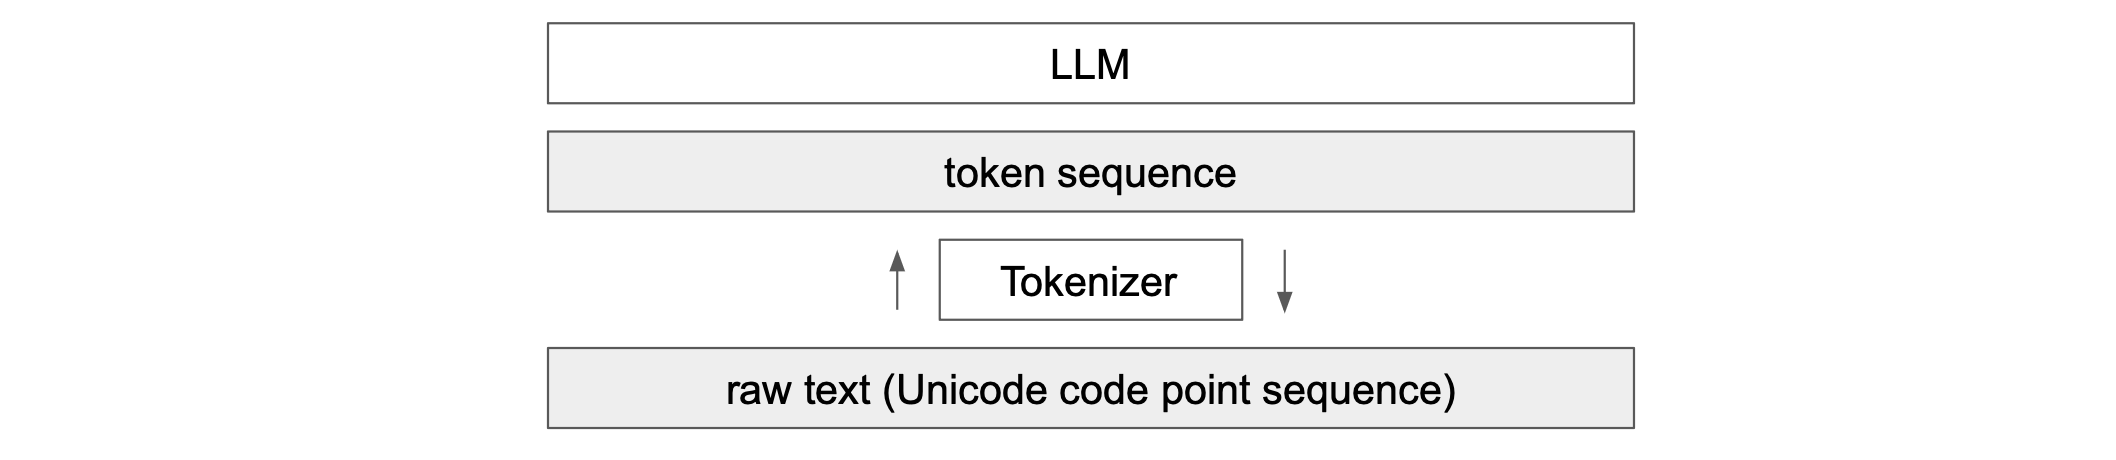

### Decoding

Given a sequence of integers in the range [0, vocab_size], what is the text?


In [103]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text

print(decode([128]))

�


### Encoding

The other way around: Given a string, what are the tokens?


In [ ]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 258,
 (116, 104): 259,
 (101, 114): 260,
 (99, 111): 261,
 (116, 32): 262,
 (226, 128): 263,
 (44, 32): 264,
 (97, 110): 265,
 (111, 114): 266,
 (100, 32): 267,
 (97, 114): 268,
 (101, 110): 269,
 (257, 103): 270,
 (261, 100): 271,
 (121, 32): 272,
 (46, 32): 273,
 (97, 108): 274,
 (259, 256): 275,
 (111, 110): 276,
 (111, 32): 277,
 (116, 105): 278,
 (97, 99): 279,
 (101, 115): 280,
 (111, 102): 281,
 (271, 256): 282,
 (112, 111): 283,
 (270, 32): 284,
 (281, 32): 285,
 (101, 267): 286,
 (116, 260): 287,
 (116, 277): 288,
 (257, 32): 289,
 (97, 32): 290,
 (266, 32): 291,
 (115, 116): 292,
 (111, 117): 293,
 (99, 104): 294,
 (120, 120): 295,
 (101, 120): 296,
 (101, 258): 297,
 (263, 156): 298,
 (263, 157): 299,
 (261, 109): 300,
 (265, 267): 301,
 (112, 108): 302,
 (105, 116): 303,
 (283, 257): 304,
 (114, 101): 305,
 (263, 153): 306,
 (110, 105): 307,
 (274, 108): 308,
 (97, 116): 309,
 (260, 32): 310,
 (105, 258): 311,
 (282, 304): 312,

In [104]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode(""))

[]


In [105]:
print(decode(encode(text0)))

हम होंगे कामयाब ( का गिरिजा कुमार माथुर द्वारा किया गया हिंदी भावानुवाद) एक प्रतिरोध गीत है। यह गीत बीसवीं सदी में नागरिक अधिकार आंदोलन का प्रधान स्वर बना। इस गीत को आमतौर पर "ई'ल्ल ओवर्कमे सोम दए" ("आई विल ओवरकम सम डे") से काव्यावतरित माना जाता है, जो चार्ल्स अल्बर्ट टिंडले द्वारा गाया गया था और जिसे १९०० में पहली बार प्रकाशित किया गया था।
नागरिक अधिकार आंदोलन
देशभक्ति के गीत


In [106]:
text2 = decode(encode(text0))
print(text2 == text0)

True


Let's check out the [GPT-2 paper](https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf) again, section 2.2 to be specific. [encodey.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py)

In [107]:
import regex as re
pat = re.compile(r"""| ?\p{L}+""")
print(re.findall(pat, "Tiger's dead. I've killed it!"))
print(re.findall(pat, text0))

['', 'Tiger', '', '', 's', '', ' dead', '', '', ' I', '', '', 've', '', ' killed', '', ' it', '', '']
['', 'हम', '', ' ह', '', '', '', 'ग', '', '', ' क', '', '', 'मय', '', '', 'ब', '', '', '', ' क', '', '', ' ग', '', '', 'र', '', '', 'ज', '', '', ' क', '', '', 'म', '', '', 'र', '', ' म', '', '', 'थ', '', '', 'र', '', ' द', '', '', 'व', '', '', 'र', '', '', ' क', '', '', 'य', '', '', ' गय', '', '', ' ह', '', '', '', 'द', '', '', ' भ', '', '', 'व', '', '', 'न', '', '', 'व', '', '', 'द', '', '', ' एक', '', ' प', '', '', 'रत', '', '', 'र', '', '', 'ध', '', ' ग', '', '', 'त', '', ' ह', '', '', '', ' यह', '', ' ग', '', '', 'त', '', ' ब', '', '', 'सव', '', '', '', ' सद', '', '', ' म', '', '', '', ' न', '', '', 'गर', '', '', 'क', '', ' अध', '', '', 'क', '', '', 'र', '', ' आ', '', '', 'द', '', '', 'लन', '', ' क', '', '', ' प', '', '', 'रध', '', '', 'न', '', ' स', '', '', 'वर', '', ' बन', '', '', '', ' इस', '', ' ग', '', '', 'त', '', ' क', '', '', ' आमत', '', '', 'र', '', ' पर', '', '', '', 'ई',

In [108]:
import regex as re
pat = re.compile(r"""'s|'ve| ?\p{L}+| ?\p{N}+|""")
print(re.findall(pat, "Tiger's dead. I've killed it!"))
print(re.findall(pat, text0))

['Tiger', "'s", ' dead', '', ' I', "'ve", ' killed', ' it', '', '']
['हम', ' ह', '', '', 'ग', '', ' क', '', 'मय', '', 'ब', '', '', ' क', '', ' ग', '', 'र', '', 'ज', '', ' क', '', 'म', '', 'र', ' म', '', 'थ', '', 'र', ' द', '', 'व', '', 'र', '', ' क', '', 'य', '', ' गय', '', ' ह', '', '', 'द', '', ' भ', '', 'व', '', 'न', '', 'व', '', 'द', '', ' एक', ' प', '', 'रत', '', 'र', '', 'ध', ' ग', '', 'त', ' ह', '', '', ' यह', ' ग', '', 'त', ' ब', '', 'सव', '', '', ' सद', '', ' म', '', '', ' न', '', 'गर', '', 'क', ' अध', '', 'क', '', 'र', ' आ', '', 'द', '', 'लन', ' क', '', ' प', '', 'रध', '', 'न', ' स', '', 'वर', ' बन', '', '', ' इस', ' ग', '', 'त', ' क', '', ' आमत', '', 'र', ' पर', '', '', 'ई', '', 'ल', '', 'ल', ' ओवर', '', 'कम', '', ' स', '', 'म', ' दए', '', '', '', '', 'आई', ' व', '', 'ल', ' ओवरकम', ' सम', ' ड', '', '', '', ' स', '', ' क', '', 'व', '', 'य', '', 'वतर', '', 'त', ' म', '', 'न', '', ' ज', '', 'त', '', ' ह', '', '', ' ज', '', ' च', '', 'र', '', 'ल', '', 'स', ' अल', '', 'बर', '', '

[Regex info](https://www.regular-expressions.info/refunicode.html)

### Forced splits using regex patterns (GPT series)

In [110]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))
print(re.findall(gpt2pat, text0))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']
['हम', ' ह', 'ों', 'ग', 'े', ' क', 'ा', 'मय', 'ा', 'ब', ' (', ' क', 'ा', ' ग', 'ि', 'र', 'ि', 'ज', 'ा', ' क', 'ु', 'म', 'ा', 'र', ' म', 'ा', 'थ', 'ु', 'र', ' द', '्', 'व', 'ा', 'र', 'ा', ' क', 'ि', 'य', 'ा', ' गय', 'ा', ' ह', 'िं', 'द', 'ी', ' भ', 'ा', 'व', 'ा', 'न', 'ु', 'व', 'ा', 'द', ')', ' एक', ' प', '्', 'रत', 'ि', 'र', 'ो', 'ध', ' ग', 'ी', 'त', ' ह', 'ै।', ' यह', ' ग', 'ी', 'त', ' ब', 'ी', 'सव', 'ीं', ' सद', 'ी', ' म', 'ें', ' न', 'ा', 'गर', 'ि', 'क', ' अध', 'ि', 'क', 'ा', 'र', ' आ', 'ं', 'द', 'ो', 'लन', ' क', 'ा', ' प', '्', 'रध', 'ा', 'न', ' स', '्', 'वर', ' बन', 'ा।', ' इस', ' ग', 'ी', 'त', ' क', 'ो', ' आमत', 'ौ', 'र', ' पर', ' "', 'ई', "'", 'ल', '्', 'ल', ' ओवर', '्', 'कम', 'े', ' स', 'ो', 'म', ' दए', '"', ' ("', 'आई', ' व', 'ि', 'ल', ' ओवरकम', ' सम', ' ड', 'े")', ' स', 'े', ' क', 'ा', 'व', '्', 'य', 'ा', 'वतर', 'ि', 'त', ' म', 'ा', 'न', 'ा', ' ज', 'ा', 'त', 'ा', ' ह', 'ै,', ' ज', 'ो', ' च', 'ा', 'र', '्'

In [160]:

# Correct regex pattern (string must be in quotes)
devanagari_word = re.compile(
    # r'(?:[\u0904-\u0939\u0958-\u0961]'  # base consonant or vowel
    # r'(?:[\u093C\u094D]?[\u0904-\u0939\u0958-\u0961])*'  # optional nukta + conjunct clusters
    # r'[\u0900-\u0903\u093A-\u094F\u0951-\u0957\u0962-\u0963]*'  # vowel signs, diacritics
    # r')+'
    r'(?:[\u0904-\u0939\u0958-\u0961\u0966-\u096F]'
    r'(?:[\u093C\u094D]?[\u0904-\u0939\u0958-\u0961])*'
    r'[\u0900-\u0903\u093A-\u094F\u0951-\u0957\u0962-\u0963]*'
    r')+'
)



# print(re.findall(pat, "Tiger's dead. I'VE killed it!"))
print(text0)
print(re.findall(devanagari_word, text0))

हम होंगे कामयाब ( का गिरिजा कुमार माथुर द्वारा किया गया हिंदी भावानुवाद) एक प्रतिरोध गीत है। यह गीत बीसवीं सदी में नागरिक अधिकार आंदोलन का प्रधान स्वर बना। इस गीत को आमतौर पर "ई'ल्ल ओवर्कमे सोम दए" ("आई विल ओवरकम सम डे") से काव्यावतरित माना जाता है, जो चार्ल्स अल्बर्ट टिंडले द्वारा गाया गया था और जिसे १९०० में पहली बार प्रकाशित किया गया था।
नागरिक अधिकार आंदोलन
देशभक्ति के गीत
['हम', 'होंगे', 'कामयाब', 'का', 'गिरिजा', 'कुमार', 'माथुर', 'द्वारा', 'किया', 'गया', 'हिंदी', 'भावानुवाद', 'एक', 'प्रतिरोध', 'गीत', 'है', 'यह', 'गीत', 'बीसवीं', 'सदी', 'में', 'नागरिक', 'अधिकार', 'आंदोलन', 'का', 'प्रधान', 'स्वर', 'बना', 'इस', 'गीत', 'को', 'आमतौर', 'पर', 'ई', 'ल्ल', 'ओवर्कमे', 'सोम', 'दए', 'आई', 'विल', 'ओवरकम', 'सम', 'डे', 'से', 'काव्यावतरित', 'माना', 'जाता', 'है', 'जो', 'चार्ल्स', 'अल्बर्ट', 'टिंडले', 'द्वारा', 'गाया', 'गया', 'था', 'और', 'जिसे', '१९००', 'में', 'पहली', 'बार', 'प्रकाशित', 'किया', 'गया', 'था', 'नागरिक', 'अधिकार', 'आंदोलन', 'देशभक्ति', 'के', 'गीत']


In [111]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "इस वाक्य का अनुवाद गूगल ट्रांसलेट द्वारा किया जा रहा है।😅"))
print(re.findall(gpt2pat, text0))

['इस', ' व', 'ा', 'क', '्', 'य', ' क', 'ा', ' अन', 'ु', 'व', 'ा', 'द', ' ग', 'ू', 'गल', ' ट', '्', 'र', 'ां', 'सल', 'े', 'ट', ' द', '्', 'व', 'ा', 'र', 'ा', ' क', 'ि', 'य', 'ा', ' ज', 'ा', ' रह', 'ा', ' ह', 'ै।😅']
['हम', ' ह', 'ों', 'ग', 'े', ' क', 'ा', 'मय', 'ा', 'ब', ' (', ' क', 'ा', ' ग', 'ि', 'र', 'ि', 'ज', 'ा', ' क', 'ु', 'म', 'ा', 'र', ' म', 'ा', 'थ', 'ु', 'र', ' द', '्', 'व', 'ा', 'र', 'ा', ' क', 'ि', 'य', 'ा', ' गय', 'ा', ' ह', 'िं', 'द', 'ी', ' भ', 'ा', 'व', 'ा', 'न', 'ु', 'व', 'ा', 'द', ')', ' एक', ' प', '्', 'रत', 'ि', 'र', 'ो', 'ध', ' ग', 'ी', 'त', ' ह', 'ै।', ' यह', ' ग', 'ी', 'त', ' ब', 'ी', 'सव', 'ीं', ' सद', 'ी', ' म', 'ें', ' न', 'ा', 'गर', 'ि', 'क', ' अध', 'ि', 'क', 'ा', 'र', ' आ', 'ं', 'द', 'ो', 'लन', ' क', 'ा', ' प', '्', 'रध', 'ा', 'न', ' स', '्', 'वर', ' बन', 'ा।', ' इस', ' ग', 'ी', 'त', ' क', 'ो', ' आमत', 'ौ', 'र', ' पर', ' "', 'ई', "'", 'ल', '्', 'ल', ' ओवर', '्', 'कम', 'े', ' स', 'ो', 'म', ' दए', '"', ' ("', 'आई', ' व', 'ि', 'ल', ' ओवरकम', ' सम', ' ड', 'े")', '

In [112]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 HOW'S are you!!!?"))
print(re.findall(gpt2pat, text0))

['Hello', "'ve", ' world', '123', ' HOW', "'", 'S', ' are', ' you', '!!!?']
['हम', ' ह', 'ों', 'ग', 'े', ' क', 'ा', 'मय', 'ा', 'ब', ' (', ' क', 'ा', ' ग', 'ि', 'र', 'ि', 'ज', 'ा', ' क', 'ु', 'म', 'ा', 'र', ' म', 'ा', 'थ', 'ु', 'र', ' द', '्', 'व', 'ा', 'र', 'ा', ' क', 'ि', 'य', 'ा', ' गय', 'ा', ' ह', 'िं', 'द', 'ी', ' भ', 'ा', 'व', 'ा', 'न', 'ु', 'व', 'ा', 'द', ')', ' एक', ' प', '्', 'रत', 'ि', 'र', 'ो', 'ध', ' ग', 'ी', 'त', ' ह', 'ै।', ' यह', ' ग', 'ी', 'त', ' ब', 'ी', 'सव', 'ीं', ' सद', 'ी', ' म', 'ें', ' न', 'ा', 'गर', 'ि', 'क', ' अध', 'ि', 'क', 'ा', 'र', ' आ', 'ं', 'द', 'ो', 'लन', ' क', 'ा', ' प', '्', 'रध', 'ा', 'न', ' स', '्', 'वर', ' बन', 'ा।', ' इस', ' ग', 'ी', 'त', ' क', 'ो', ' आमत', 'ौ', 'र', ' पर', ' "', 'ई', "'", 'ल', '्', 'ल', ' ओवर', '्', 'कम', 'े', ' स', 'ो', 'म', ' दए', '"', ' ("', 'आई', ' व', 'ि', 'ल', ' ओवरकम', ' सम', ' ड', 'े")', ' स', 'े', ' क', 'ा', 'व', '्', 'य', 'ा', 'वतर', 'ि', 'त', ' म', 'ा', 'न', 'ा', ' ज', 'ा', 'त', 'ा', ' ह', 'ै,', ' ज', 'ो', ' च', 'ा', 'र',

In [113]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
print(re.findall(gpt2pat, text0))
print(re.findall(gpt2pat, "Hello've world123 HOW'S are         you!!!?"))

['हम', ' ह', 'ों', 'ग', 'े', ' क', 'ा', 'मय', 'ा', 'ब', ' (', ' क', 'ा', ' ग', 'ि', 'र', 'ि', 'ज', 'ा', ' क', 'ु', 'म', 'ा', 'र', ' म', 'ा', 'थ', 'ु', 'र', ' द', '्', 'व', 'ा', 'र', 'ा', ' क', 'ि', 'य', 'ा', ' गय', 'ा', ' ह', 'िं', 'द', 'ी', ' भ', 'ा', 'व', 'ा', 'न', 'ु', 'व', 'ा', 'द', ')', ' एक', ' प', '्', 'रत', 'ि', 'र', 'ो', 'ध', ' ग', 'ी', 'त', ' ह', 'ै।', ' यह', ' ग', 'ी', 'त', ' ब', 'ी', 'सव', 'ीं', ' सद', 'ी', ' म', 'ें', ' न', 'ा', 'गर', 'ि', 'क', ' अध', 'ि', 'क', 'ा', 'र', ' आ', 'ं', 'द', 'ो', 'लन', ' क', 'ा', ' प', '्', 'रध', 'ा', 'न', ' स', '्', 'वर', ' बन', 'ा।', ' इस', ' ग', 'ी', 'त', ' क', 'ो', ' आमत', 'ौ', 'र', ' पर', ' "', 'ई', "'", 'ल', '्', 'ल', ' ओवर', '्', 'कम', 'े', ' स', 'ो', 'म', ' दए', '"', ' ("', 'आई', ' व', 'ि', 'ल', ' ओवरकम', ' सम', ' ड', 'े")', ' स', 'े', ' क', 'ा', 'व', '्', 'य', 'ा', 'वतर', 'ि', 'त', ' म', 'ा', 'न', 'ा', ' ज', 'ा', 'त', 'ा', ' ह', 'ै,', ' ज', 'ो', ' च', 'ा', 'र', '्', 'ल', '्', 'स', ' अल', '्', 'बर', '्', 'ट', ' ट', 'िं', 'डल', 'े', ' द'

In [ ]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


GPT-2 still didn't caught all the spaces in case of Python

In [114]:
!pip install tiktoken # added for colab

[Tiktoken](https://tiktokenizer.vercel.app/?model=o200k_base) and GPT4 [Regex](https://github.com/openai/tiktoken/blob/main/tiktoken_ext/openai_public.py)

In [115]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


In [116]:
pat = re.compile(r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
print(re.findall(pat, "Tiger's dead. I've killed it!"))
print(re.findall(pat, text0))

['Tiger', "'s", ' dead', '.', ' I', "'ve", ' killed', ' it', '!']
['हम', ' ह', 'ों', 'ग', 'े', ' क', 'ा', 'मय', 'ा', 'ब', ' (', ' क', 'ा', ' ग', 'ि', 'र', 'ि', 'ज', 'ा', ' क', 'ु', 'म', 'ा', 'र', ' म', 'ा', 'थ', 'ु', 'र', ' द', '्', 'व', 'ा', 'र', 'ा', ' क', 'ि', 'य', 'ा', ' गय', 'ा', ' ह', 'िं', 'द', 'ी', ' भ', 'ा', 'व', 'ा', 'न', 'ु', 'व', 'ा', 'द', ')', ' एक', ' प', '्', 'रत', 'ि', 'र', 'ो', 'ध', ' ग', 'ी', 'त', ' ह', 'ै।', ' यह', ' ग', 'ी', 'त', ' ब', 'ी', 'सव', 'ीं', ' सद', 'ी', ' म', 'ें', ' न', 'ा', 'गर', 'ि', 'क', ' अध', 'ि', 'क', 'ा', 'र', ' आ', 'ं', 'द', 'ो', 'लन', ' क', 'ा', ' प', '्', 'रध', 'ा', 'न', ' स', '्', 'वर', ' बन', 'ा।', ' इस', ' ग', 'ी', 'त', ' क', 'ो', ' आमत', 'ौ', 'र', ' पर', ' "', 'ई', "'", 'ल', '्', 'ल', ' ओवर', '्', 'कम', 'े', ' स', 'ो', 'म', ' दए', '"', ' ("', 'आई', ' व', 'ि', 'ल', ' ओवरकम', ' सम', ' ड', 'े")', ' स', 'े', ' क', 'ा', 'व', '्', 'य', 'ा', 'वतर', 'ि', 'त', ' म', 'ा', 'न', 'ा', ' ज', 'ा', 'त', 'ा', ' ह', 'ै,', ' ज', 'ो', ' च', 'ा', 'र', '्', 'ल',

In [117]:
pat = re.compile(r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+""")
print(re.findall(pat, "Tiger's dead. I'VE killed it!"))
print(re.findall(pat, text0))

['Tiger', "'s", ' dead', '.', ' I', "'VE", ' killed', ' it', '!']
['हम', ' ह', 'ों', 'ग', 'े', ' क', 'ामय', 'ाब', ' (', ' क', 'ा', ' ग', 'िर', 'िज', 'ा', ' क', 'ुम', 'ार', ' म', 'ाथ', 'ुर', ' द', '्व', 'ार', 'ा', ' क', 'िय', 'ा', ' गय', 'ा', ' ह', 'िं', 'द', 'ी', ' भ', 'ाव', 'ान', 'ुव', 'ाद', ')', ' एक', ' प', '्रत', 'िर', 'ोध', ' ग', 'ीत', ' ह', 'ै।', ' यह', ' ग', 'ीत', ' ब', 'ीसव', 'ीं', ' सद', 'ी', ' म', 'ें', ' न', 'ागर', 'िक', ' अध', 'िक', 'ार', ' आ', 'ंद', 'ोलन', ' क', 'ा', ' प', '्रध', 'ान', ' स', '्वर', ' बन', 'ा।', ' इस', ' ग', 'ीत', ' क', 'ो', ' आमत', 'ौर', ' पर', ' "', 'ई', "'ल", '्ल', ' ओवर', '्कम', 'े', ' स', 'ोम', ' दए', '"', ' ("', 'आई', ' व', 'िल', ' ओवरकम', ' सम', ' ड', 'े")', ' स', 'े', ' क', 'ाव', '्य', 'ावतर', 'ित', ' म', 'ान', 'ा', ' ज', 'ात', 'ा', ' ह', 'ै,', ' ज', 'ो', ' च', 'ार', '्ल', '्स', ' अल', '्बर', '्ट', ' ट', 'िं', 'डल', 'े', ' द', '्व', 'ार', 'ा', ' ग', 'ाय', 'ा', ' गय', 'ा', ' थ', 'ा', ' और', ' ज', 'िस', 'े', ' ', '१९०', '०', ' म', 'ें', ' पहल', 'ी', '

r"""...""":

The r before the triple quotes denotes a raw string in Python, which means that escape sequences are not processed, making it easier to define regex patterns.
'(?i:[sdmt]|ll|ve|re):

': Matches a single quote.
(?i:...):: Enables case-insensitive matching within the group.
[sdmt]: Matches any single character 's', 'd', 'm', or 't'.
|: Acts as an OR operator.
ll, ve, re: Matches the exact sequences 'll', 've', or 're'.
In summary, this part matches a single quote followed by either 's', 'd', 'm', 't', 'll', 've', or 're', case-insensitively.
[^\r\n\p{L}\p{N}]?+\p{L}+:

[^\r\n\p{L}\p{N}]?+: Matches zero or one non-line-break, non-letter, non-number characters. The + after ? makes it possessive, meaning it will not backtrack once a match is found.
\p{L}+: Matches one or more Unicode letters.
This part matches zero or one non-letter/number/line-break character followed by one or more letters.
\p{N}{1,3}:

\p{N}: Matches any Unicode digit.
{1,3}: Matches between 1 and 3 digits.
This part matches between 1 and 3 consecutive digits.
** ?[^\s\p{L}\p{N}]++[\r\n]***:

** ?**: Matches zero or one space.
[^\s\p{L}\p{N}]++: Matches one or more non-space, non-letter, non-number characters possessively.
[\r\n]*:: Matches zero or more line break characters (carriage return or newline).
This part matches an optional space followed by one or more non-space, non-letter, non-number characters, followed by zero or more line breaks.
*\s[\r\n]**:

\s*: Matches zero or more whitespace characters.
[\r\n]: Matches a single line break character (carriage return or newline).
This part matches zero or more whitespace characters followed by a line break.
\s+(?!\S):

\s+: Matches one or more whitespace characters.
(?!\S): Negative lookahead asserting that what follows is not a non-whitespace character.
This part matches one or more whitespace characters that are followed by the end of the string or another whitespace character (i.e., matches trailing spaces).
\s+:

Matches one or more whitespace characters.
This part matches any sequence of one or more whitespace characters.

In [118]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2025-11-07 11:14:16--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.244.1
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.244.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe’

vocab.bpe           100%[===================>] 445.62K   532KB/s    in 0.8s    

2025-11-07 11:14:18 (532 KB/s) - ‘vocab.bpe’ saved [456318/456318]

--2025-11-07 11:14:18--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.244.1
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.244.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving to: ‘enco

In [119]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"


In [120]:
len(encoder) # 256 raw byte tokens. 50,000 merges. +1 special token

50257

In [121]:
type(encoder)

dict

In [122]:
encoder['<|endoftext|>'] # the only special token in use for the GPT-2 base model

50256

# [Extending tiktoken](https://github.com/openai/tiktoken)

In [123]:
cl100k_base = tiktoken.get_encoding("cl100k_base")

# In production, load the arguments directly instead of accessing private attributes
# See openai_public.py for examples of arguments for specific encodings
enc = tiktoken.Encoding(
    # If you're changing the set of special tokens, make sure to use a different name
    # It should be clear from the name what behaviour to expect.
    name="cl100k_im",
    pat_str=cl100k_base._pat_str,
    mergeable_ranks=cl100k_base._mergeable_ranks,
    special_tokens={
        **cl100k_base._special_tokens,
        "<|im_start|>": 100264,
        "<|im_end|>": 100265,
    }
)

### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

[sentencepiece on Github link](https://github.com/google/sentencepiece).

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

(Personally I think the tiktoken way is a lot cleaner...)

In [124]:
import sentencepiece as spm

In [125]:
# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

Docs for sentencepiece options:

- [markdown](https://github.com/google/sentencepiece/blob/master/doc/options.md)
- [protobuf](https://github.com/google/sentencepiece/blob/master/src/sentencepiece_model.proto#L193)

In [126]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [127]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [128]:
ids = sp.encode("hello इस वाक्य का")
print(ids)

idh =sp.encode(text0)
print(idh)

[362, 378, 361, 372, 358, 362, 227, 167, 138, 227, 167, 187, 362, 227, 167, 184, 227, 167, 193, 227, 167, 152, 227, 168, 144, 227, 167, 178, 362, 227, 167, 152, 227, 167, 193]
[362, 227, 167, 188, 227, 167, 177, 362, 227, 167, 188, 227, 168, 142, 227, 167, 133, 227, 167, 154, 227, 168, 138, 362, 227, 167, 152, 227, 167, 193, 227, 167, 177, 227, 167, 178, 227, 167, 193, 227, 167, 175, 309, 362, 227, 167, 152, 227, 167, 193, 362, 227, 167, 154, 227, 167, 194, 227, 167, 179, 227, 167, 194, 227, 167, 159, 227, 167, 193, 362, 227, 167, 152, 227, 168, 132, 227, 167, 177, 227, 167, 193, 227, 167, 179, 362, 227, 167, 177, 227, 167, 193, 227, 167, 168, 227, 168, 132, 227, 167, 179, 362, 227, 167, 169, 227, 168, 144, 227, 167, 184, 227, 167, 193, 227, 167, 179, 227, 167, 193, 362, 227, 167, 152, 227, 167, 194, 227, 167, 178, 227, 167, 193, 362, 227, 167, 154, 227, 167, 178, 227, 167, 193, 362, 227, 167, 188, 227, 167, 194, 227, 167, 133, 227, 167, 169, 227, 168, 131, 362, 227, 167, 176, 227, 167

In [129]:
print([sp.id_to_piece(idx) for idx in ids])

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xE0>', '<0xA4>', '<0x87>', '<0xE0>', '<0xA4>', '<0xB8>', '▁', '<0xE0>', '<0xA4>', '<0xB5>', '<0xE0>', '<0xA4>', '<0xBE>', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA5>', '<0x8D>', '<0xE0>', '<0xA4>', '<0xAF>', '▁', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA4>', '<0xBE>']


In [131]:
print([sp.id_to_piece(idx) for idx in idh])

['▁', '<0xE0>', '<0xA4>', '<0xB9>', '<0xE0>', '<0xA4>', '<0xAE>', '▁', '<0xE0>', '<0xA4>', '<0xB9>', '<0xE0>', '<0xA5>', '<0x8B>', '<0xE0>', '<0xA4>', '<0x82>', '<0xE0>', '<0xA4>', '<0x97>', '<0xE0>', '<0xA5>', '<0x87>', '▁', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA4>', '<0xBE>', '<0xE0>', '<0xA4>', '<0xAE>', '<0xE0>', '<0xA4>', '<0xAF>', '<0xE0>', '<0xA4>', '<0xBE>', '<0xE0>', '<0xA4>', '<0xAC>', '▁(', '▁', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA4>', '<0xBE>', '▁', '<0xE0>', '<0xA4>', '<0x97>', '<0xE0>', '<0xA4>', '<0xBF>', '<0xE0>', '<0xA4>', '<0xB0>', '<0xE0>', '<0xA4>', '<0xBF>', '<0xE0>', '<0xA4>', '<0x9C>', '<0xE0>', '<0xA4>', '<0xBE>', '▁', '<0xE0>', '<0xA4>', '<0x95>', '<0xE0>', '<0xA5>', '<0x81>', '<0xE0>', '<0xA4>', '<0xAE>', '<0xE0>', '<0xA4>', '<0xBE>', '<0xE0>', '<0xA4>', '<0xB0>', '▁', '<0xE0>', '<0xA4>', '<0xAE>', '<0xE0>', '<0xA4>', '<0xBE>', '<0xE0>', '<0xA4>', '<0xA5>', '<0xE0>', '<0xA5>', '<0x81>', '<0xE0>', '<0xA4>', '<0xB0>', '▁', '<0xE0>', '<0xA4>', '<0

add_dummy_prefix check:
world
hello world
on tiktoken app

[Andrej's original Colab File link](https://colab.research.google.com/drive/1y0KnCFZvGVf_odSfcNAws6kcDD7HsI0L?usp=sharing#scrollTo=xKaWXIaiOhvs)